# Imports

In [1]:
import numpy             as np
import pandas            as pd
import seaborn           as sns
import plotly.express    as px
import matplotlib.pyplot as plt

from matplotlib.pyplot     import figure
from matplotlib.pyplot     import plot
from IPython.core.display  import HTML
from geopy.geocoders       import Nominatim
from tabulate              import tabulate
from geopy                 import distance
from geopy.distance        import great_circle


## Helper Functions

In [482]:
def jupyter_settings():
    %matplotlib inline
        
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = (20,15)
    plt.rcParams['font.size'] = 20
        
    display( HTML( '<style>.container { width:90% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.options.display.float_format = '{:,.2f}'.format
    pd.set_option( 'display.expand_frame_repr', False)        
            
    sns.set()
    sns.set_theme(style = 'darkgrid', font_scale = 2)
    sns.set_style("darkgrid")


In [483]:
jupyter_settings()

## Loading Data

In [4]:
df_raw = pd.read_csv(r'../datasets/raw/kc_house_data.csv')

# Data Description

In [5]:
df1=df_raw.copy()

## Rename Columns

In [6]:
# checking columns names
df1.columns # nothing to rename

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Data Types

In [7]:
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,"221,900.00",3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,"538,000.00",3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,"180,000.00",2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,"604,000.00",4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,"510,000.00",3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [8]:
df1.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Data Dimension

In [9]:
print('Number of rows: {}' .format (df1.shape[0]))
print('Number of columns: {}' .format (df1.shape[1]))

Number of rows: 21613
Number of columns: 21


## Check NA

In [10]:
df1.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Fill out NA

## Change Variables Types

In [11]:
# changing 'date' type from OBJECT to DATE

# checking DATES types
print(df1[['date','yr_built','yr_renovated']].head(),'\n')
print(df1[['date','yr_built','yr_renovated']].dtypes)

# changing dtypes
df1['date']         = pd.to_datetime(df1['date'],         format='%Y-%m-%d')
# df1['yr_built']     = pd.to_datetime(df1['yr_built'],     format='%Y-%m-%d')
# df1['yr_renovated'] = pd.to_datetime(df1['yr_renovated'], format='%Y-%m-%d')

# checking DATES types
print("")
print(df1[['date','yr_built','yr_renovated']].dtypes)
df1[['date','yr_built','yr_renovated']].head()

              date  yr_built  yr_renovated
0  20141013T000000      1955             0
1  20141209T000000      1951          1991
2  20150225T000000      1933             0
3  20141209T000000      1965             0
4  20150218T000000      1987             0 

date            object
yr_built         int64
yr_renovated     int64
dtype: object

date            datetime64[ns]
yr_built                 int64
yr_renovated             int64
dtype: object


,date,yr_built,yr_renovated
0,2014-10-13,1955,0
1,2014-12-09,1951,1991
2,2015-02-25,1933,0
3,2014-12-09,1965,0
4,2015-02-18,1987,0


## Dropping Duplicates 

In [12]:
print(df1.shape[0], 'number of rows')
print(df1['id'].unique().shape[0], 'uniques ids')
print(df1.shape[0] - df1['id'].unique().shape[0], '  number of duplicated ids')

21613 number of rows
21436 uniques ids
177   number of duplicated ids


In [13]:
# sorting dataframe by date
df1 = df1.sort_values('date', ascending=True)

# deleting ids that appears first
df1 = df1.drop_duplicates(subset='id', keep='last')

print('new shape:', df1.shape)

new shape: (21436, 21)


## Descriptive Statistics

In [14]:
num_df1 = df1.select_dtypes(include=['int64','float64'])
cat_df1 = df1.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

### Numerical Attributes

In [15]:
num_df1.shape

(21436, 20)

In [16]:
# central tendendy - mean, median
ct1 = pd.DataFrame(num_df1.apply(np.mean)).T
ct2 = pd.DataFrame(num_df1.apply(np.median)).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_df1.apply(np.std)).T
d2 = pd.DataFrame(num_df1.apply(min)).T
d3 = pd.DataFrame(num_df1.apply(max)).T
d4 = pd.DataFrame(num_df1.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_df1.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_df1.apply(lambda x: x.kurtosis)).T

# concatenate 
m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,"1,000,102.0","9,900,000,190.0","9,899,000,088.0","4,580,765,328.18","3,904,921,185.0","2,876,522,535.73",0.24,<bound method NDFrame._add_numeric_operations....
1,price,"75,000.0","7,700,000.0","7,625,000.0","541,649.96","450,000.0","367,306.36",4.04,<bound method NDFrame._add_numeric_operations....
2,bedrooms,0.0,33.0,33.0,3.37,3.0,0.93,1.99,<bound method NDFrame._add_numeric_operations....
3,bathrooms,0.0,8.0,8.0,2.12,2.25,0.77,0.51,<bound method NDFrame._add_numeric_operations....
4,sqft_living,290.0,"13,540.0","13,250.0","2,082.7","1,920.0",919.13,1.47,<bound method NDFrame._add_numeric_operations....
5,sqft_lot,520.0,"1,651,359.0","1,650,839.0","15,135.64","7,614.0","41,537.65",13.04,<bound method NDFrame._add_numeric_operations....
6,floors,1.0,3.5,2.5,1.5,1.5,0.54,0.61,<bound method NDFrame._add_numeric_operations....
7,waterfront,0.0,1.0,1.0,0.01,0.0,0.09,11.34,<bound method NDFrame._add_numeric_operations....
8,view,0.0,4.0,4.0,0.24,0.0,0.77,3.39,<bound method NDFrame._add_numeric_operations....
9,condition,1.0,5.0,4.0,3.41,3.0,0.65,1.04,<bound method NDFrame._add_numeric_operations....


### Categorical Attributes

In [17]:
cat_df1.shape # no attributes

(21436, 0)

# Variable Filtering 

In [18]:
df2=df1.copy()

In [19]:
df2 = df2.drop (['view', 'sqft_living15','sqft_lot15'], axis=1)


# view          	An index from 0 to 4 of how good the view of the property was

# sqft_living15 	The square footage of interior housing living space for the nearest 15 neighbors
# sqft_lot15    	The square footage of the land lots of the nearest 15 neighbors

In [20]:
# checking properties 'sqft_living' by number of bedrooms
print(df2[['bedrooms','sqft_living']].groupby(['bedrooms']).mean().sort_values('sqft_living', ascending=True))
print(df2[['id','bedrooms']].groupby(['bedrooms']).count(),'\n')

df2 = df2[ (df2['bedrooms']!=0) & (df2['bedrooms']!=11) & (df2['bedrooms']!=33) ]

          sqft_living
bedrooms             
1              884.94
2            1,240.54
33           1,620.00
0            1,707.85
3            1,807.60
4            2,556.00
11           3,000.00
5            3,054.82
6            3,310.76
10           3,706.67
9            3,775.00
8            3,800.00
7            3,974.21
            id
bedrooms      
0           13
1          194
2         2736
3         9731
4         6849
5         1586
6          265
7           38
8           13
9            6
10           3
11           1
33           1 



# Feature Engineering

In [21]:
df3 = df2.copy()

## <font color ='red'>Mind Map Hypothesis

## Creating Hypothesis

certificar que está atualizado
1. Properties that have water view are 50% more expensive.
2. Properties with basements have higher grade
3. Properties with basements have bigger 'sqft_living'
4. Properties with basements are 15% more expensive
5. Properties with more than 2 bathrooms are 20% more expensive
6. Properties with more than 2 bedrooms are 25% more expensive
7. Properties with more than 1 floor are 10% more expensive
8. Properties that were not renovated are 40% cheaper
9. Properties that were not renovated in the last 5 years are 15% cheaper
10. Properties that were built in the last 5 years are cheaper than properties that were renovated in the last 5 years
11. Most properties (+50%) became available during summer/spring
12. Properties available during summer/spring are 20% more expensive.
13. More than half properties are localized in a 15km radio from the lake.
14. Properties selected to be bought that are localized in a 15km radio from the lake results on 20% more profit


## <font color ='red'>Features Creation
    get api data

In [22]:
# get data from API in separate dataframe

# # query
# df3['query'] = df3[['lat','long']].apply(lambda x: str(x['lat']) + ',' + str(x['long']), axis=1)
# df_geodata = df3[['id', 'query']].copy()

# # creating empty columns
# df_geodata['place_id']      = "NA"
# df_geodata['house_number']  = 'NA'
# df_geodata['road']          = 'NA'
# df_geodata['neighbourhood'] = 'NA'
# df_geodata['city']          = 'NA'
# df_geodata['county']        = 'NA'
# df_geodata['state']         = 'NA'
# df_geodata['postcode']      ='NA'


# # auxiliar variable that helps localizing the adresses
# geolocator = Nominatim (user_agent = 'api') 

# # loop for
# for i in range (df_geodata.shape[0]):
    
#     print ('Loop: {} / {}'.format(i, df_geodata.shape[0]))
    
#     # api request
#     response = geolocator.reverse(query) # standard variable for API responses // 'reverse' returns an address by location point
    
#     # populating data
#     if 'place_id'in response.raw:
#         df_geodata.loc[i, 'place_id']      = response.raw['place_id']
#     if 'house_number'in response.raw['address']:
#         df_geodata.loc[i, 'house_number']  = response.raw['address']['house_number']
#     if 'road'in response.raw['address']:
#         df_geodata.loc[i, 'road']          = response.raw['address']['road']
#     if 'neighbourhood'in response.raw['address']:
#         df_geodata.loc[i, 'neighbourhood'] = response.raw['address']['neighbourhood']
#     if 'city'in response.raw['address']:
#         df_geodata.loc[i, 'city']          = response.raw['address']['city']
#     if 'county'in response.raw['address']:
#         df_geodata.loc[i,'county']         = response.raw['address']['county']
#     if 'state'in response.raw['address']:
#         df_geodata.loc[i,'state']          = response.raw['address']['state']
#     if 'postcode'in response.raw['address']:
#         df_geodata.loc[i,'postcode']       = response.raw['address']['postcode']

       
# getting geodata temporarily
df_geodata = pd.read_csv('../datasets/interim/api_geodata.csv')

df3 = pd.merge(df3, df_geodata, how='left', on='id')
df3.head()

# saving df_geodata
# df_geodata = pd.to_csv('../datasets/interim/api_geodata_realstate.csv')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,query,road,house_number,neighbourhood,city,county,state
0,5561000190,2014-05-02,"437,500.00",3,2.25,1970,35100,2.00,0,4,9,1970,0,1977,0,98027,47.46,-121.99,"47.4635,-121.991",Southeast 154th Street,26069,NaN,NaN,King County,Washington
1,472000620,2014-05-02,"790,000.00",3,2.50,2600,4750,1.00,0,4,9,1700,900,1951,0,98117,47.68,-122.40,"47.6833,-122.4",34th Avenue Northwest,7506,Sunset Hill,Seattle,King County,Washington
2,1024069009,2014-05-02,"675,000.00",5,2.50,2820,67518,2.00,0,3,8,2820,0,1979,0,98029,47.58,-122.03,"47.5794,-122.025",Southeast 32nd Way,23601,NaN,NaN,King County,Washington
3,7853361370,2014-05-02,"555,000.00",4,2.50,3310,6500,2.00,0,3,8,3310,0,2012,0,98065,47.52,-121.87,"47.515,-121.87",Southeast Terrace Street,35246,NaN,NaN,King County,Washington
4,5056500260,2014-05-02,"440,000.00",4,2.25,2160,8119,1.00,0,3,8,1080,1080,1966,0,98006,47.54,-122.18,"47.5443,-122.177",Southeast 65th Street,12201,NaN,Bellevue,King County,Washington


In [23]:
# seasons of the year

def season_from_date(date):
    year = str(date.year)
    seasons = {'spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'autumn': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'

df3['season'] = df3['date'].map(season_from_date)
df3[['date','season']].head()

,date,season
0,2014-05-02,spring
1,2014-05-02,spring
2,2014-05-02,spring
3,2014-05-02,spring
4,2014-05-02,spring


In [24]:
# radius from lake

# lake infos
lake_center = [{'lat':47.640883, 'long':-122.259250}]  
lake_tuple = 47.640883, -122.259250 
#tuple(lake_center[0].values())


# distance from Lake
df3['dist_fromlake'] = df3['query'].apply(lambda x: great_circle(lake_tuple, x).km)

df3[['query','dist_fromlake']].sample(5) 

,query,dist_fromlake
19258,"47.6684,-122.356",7.87
11727,"47.4312,-122.195",23.81
1397,"47.5757,-122.216",7.94
735,"47.6502,-122.066",14.51
16511,"47.7455,-122.073",18.16


In [25]:
# mean price by zipcode
a = df3[['price','zipcode']].groupby('zipcode').mean().reset_index().rename(columns={'price': 'mean_price_zipcode'})
a.head()

df3 = pd.merge(df3, a, on='zipcode', how='left')
df3[['id', 'price', 'zipcode', 'mean_price_zipcode']].sample(5)

,id,price,zipcode,mean_price_zipcode
11090,9264920870,"300,000.00",98023,"287,736.99"
5562,9264950600,"335,000.00",98023,"287,736.99"
9089,2767604712,"437,500.00",98107,"579,481.99"
19734,446000150,"480,000.00",98115,"622,640.77"
1209,1148000190,"249,950.00",98166,"466,502.61"


In [26]:
# decision: buy x hold

df3['decision'] = df3[['price', 'mean_price_zipcode', 'condition']].apply(lambda x: 0 if (x['price'] > x['mean_price_zipcode']) 
                                                                               else 1 if ((x['price'] <= x['mean_price_zipcode']) & (x['condition']>=3))
                                                                               else 2, axis=1) 
                                                                        
                                                             
df3[['id', 'zipcode', 'price', 'mean_price_zipcode', 'condition', 'decision']].sample(5)

,id,zipcode,price,mean_price_zipcode,condition,decision
606,9523102660,98103,"560,000.00","585,360.01",3,1
14621,993001914,98103,"344,000.00","585,360.01",3,1
15127,2524069078,98027,"2,700,000.00","616,990.59",3,0
5123,3905010010,98029,"639,000.00","612,678.53",3,0
1170,2960900040,98126,"450,000.00","426,087.71",3,0


In [27]:
# sale price suggestion

df3['sale_price_suggestion'] = df3[['price', 'mean_price_zipcode', 'condition']].apply(lambda x: 0 if (x['price'] > x['mean_price_zipcode']) 
                                                                                            else x['price']*1.3 if ((x['price'] <= x['mean_price_zipcode']) & (x['condition']>=3))
                                                                                            else x['price']*1.1, axis=1) 

df3[df3['condition']==2][['id', 'zipcode', 'price', 'mean_price_zipcode', 'condition', 'decision', 'sale_price_suggestion']].sample(5)

,id,zipcode,price,mean_price_zipcode,condition,decision,sale_price_suggestion
1665,7883603425,98108,"155,000.00","356,054.86",2,2,"170,500.00"
14280,6371500120,98116,"325,000.00","619,414.47",2,2,"357,500.00"
21116,2023059052,98055,"450,000.00","307,818.08",2,0,0.00
8557,9274204100,98116,"462,500.00","619,414.47",2,2,"508,750.00"
20385,7229700105,98059,"172,500.00","494,240.46",2,2,"189,750.00"


In [28]:
# expected profit

df3['expected_profit'] = df3[['price', 'sale_price_suggestion']].apply(lambda x: 0 if x['sale_price_suggestion']==0
                                                                                 else (x['sale_price_suggestion'] - x['price']), axis=1) 

df3[['id', 'zipcode', 'price', 'mean_price_zipcode', 'condition', 'decision', 'sale_price_suggestion', 'expected_profit']].sample(5)

,id,zipcode,price,mean_price_zipcode,condition,decision,sale_price_suggestion,expected_profit
10803,5482700115,98040,"1,280,600.00","1,194,230.02",5,0,0.00,0.00
13839,2937300040,98052,"942,990.00","645,661.26",3,0,0.00,0.00
1951,6743700335,98033,"470,000.00","803,702.16",3,1,"611,000.00","141,000.00"
5741,8024200855,98115,"499,100.00","622,640.77",3,1,"648,830.00","149,730.00"
1405,2909700070,98052,"455,500.00","645,661.26",4,1,"592,150.00","136,650.00"


# <font color ='red'>EDA

In [313]:
df4=df3.copy()

In [314]:
num_df4 = df4.select_dtypes(include=['int64','float64'])
cat_df4 = df4.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

## <font color ='red'>Univariate Analysis

### Response Variable

In [315]:
aux1 = df4[df4['expected_profit']!=0][['id', 'expected_profit']].copy()

bin_groups = list(np.arange(0,635000,5000)) # maximum profit = 630,000.00
aux1['expected_profit_binned'] = pd.cut(aux1['expected_profit'], bins=bin_groups)

aux1.head()

,id,expected_profit,expected_profit_binned
0,5561000190,"131,250.00","(130000, 135000]"
4,5056500260,"132,000.00","(130000, 135000]"
5,3438501320,"88,500.00","(85000, 90000]"
6,1737320120,"141,000.00","(140000, 145000]"
7,7197300105,"165,000.00","(160000, 165000]"


In [316]:
a1 = ( aux1.groupby('expected_profit_binned').agg(id_          = ('id', 'count'),
                                               expected_profit = ('expected_profit', 'sum')) ).reset_index()



a1.head()

,expected_profit_binned,id_,expected_profit
0,"(0, 5000]",0,0.00
1,"(5000, 10000]",6,"51,550.00"
2,"(10000, 15000]",14,"176,185.00"
3,"(15000, 20000]",33,"573,611.50"
4,"(20000, 25000]",31,"701,805.50"


In [317]:
a1.sort_values('id_', ascending=False).head()

,expected_profit_binned,id_,expected_profit
16,"(80000, 85000]",661,"54,504,310.70"
17,"(85000, 90000]",655,"57,557,274.90"
14,"(70000, 75000]",651,"47,469,928.50"
20,"(100000, 105000]",582,"59,907,629.10"
15,"(75000, 80000]",554,"43,031,773.50"


In [318]:
a1.sort_values('expected_profit', ascending=False).head()

,expected_profit_binned,id_,expected_profit
26,"(130000, 135000]",550,"73,056,579.90"
32,"(160000, 165000]",418,"68,165,804.10"
29,"(145000, 150000]",434,"64,245,276.60"
23,"(115000, 120000]",536,"63,248,474.10"
20,"(100000, 105000]",582,"59,907,629.10"


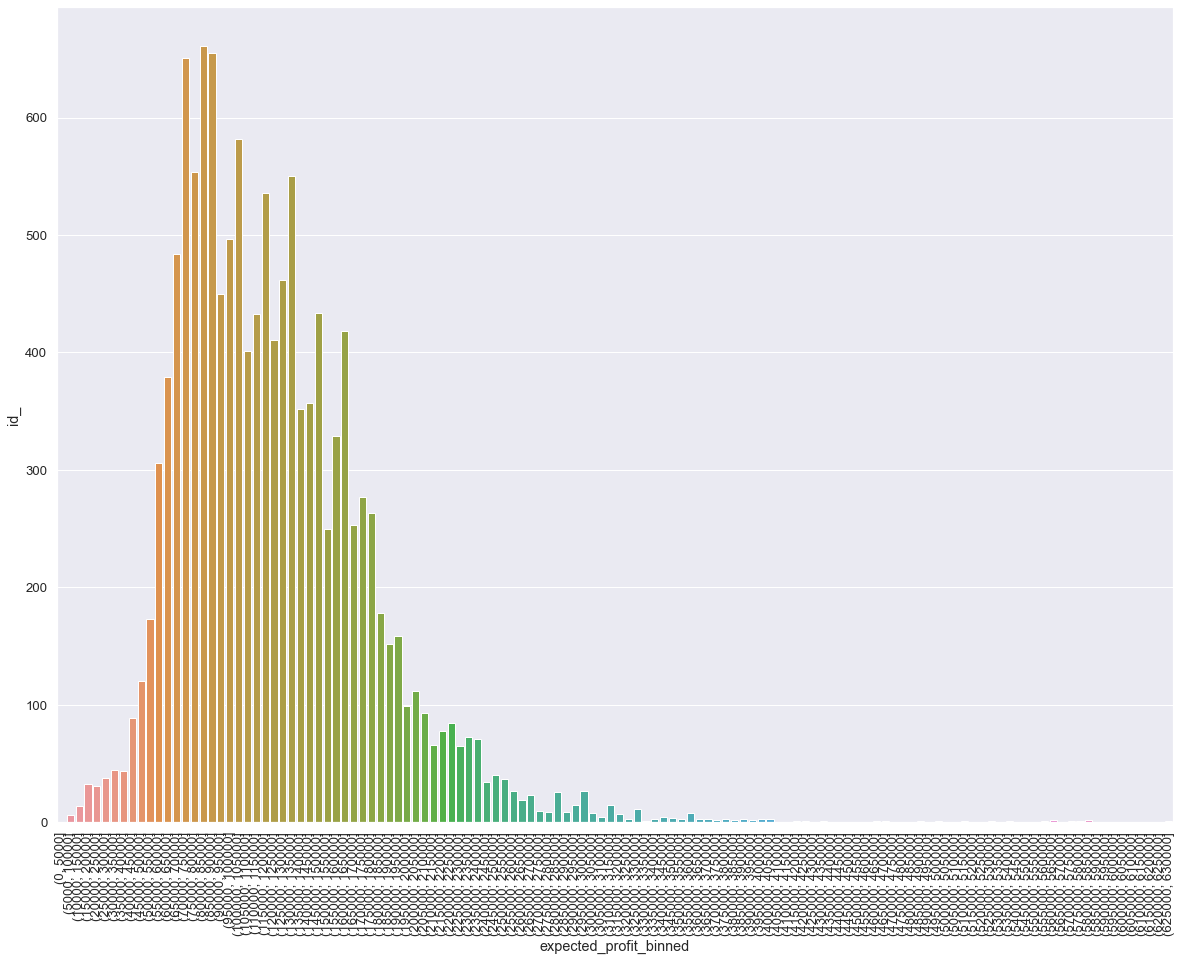

In [319]:
# id_distribution
sns.barplot(data=a1, x='expected_profit_binned', y='id_');
plt.xticks(rotation=90);

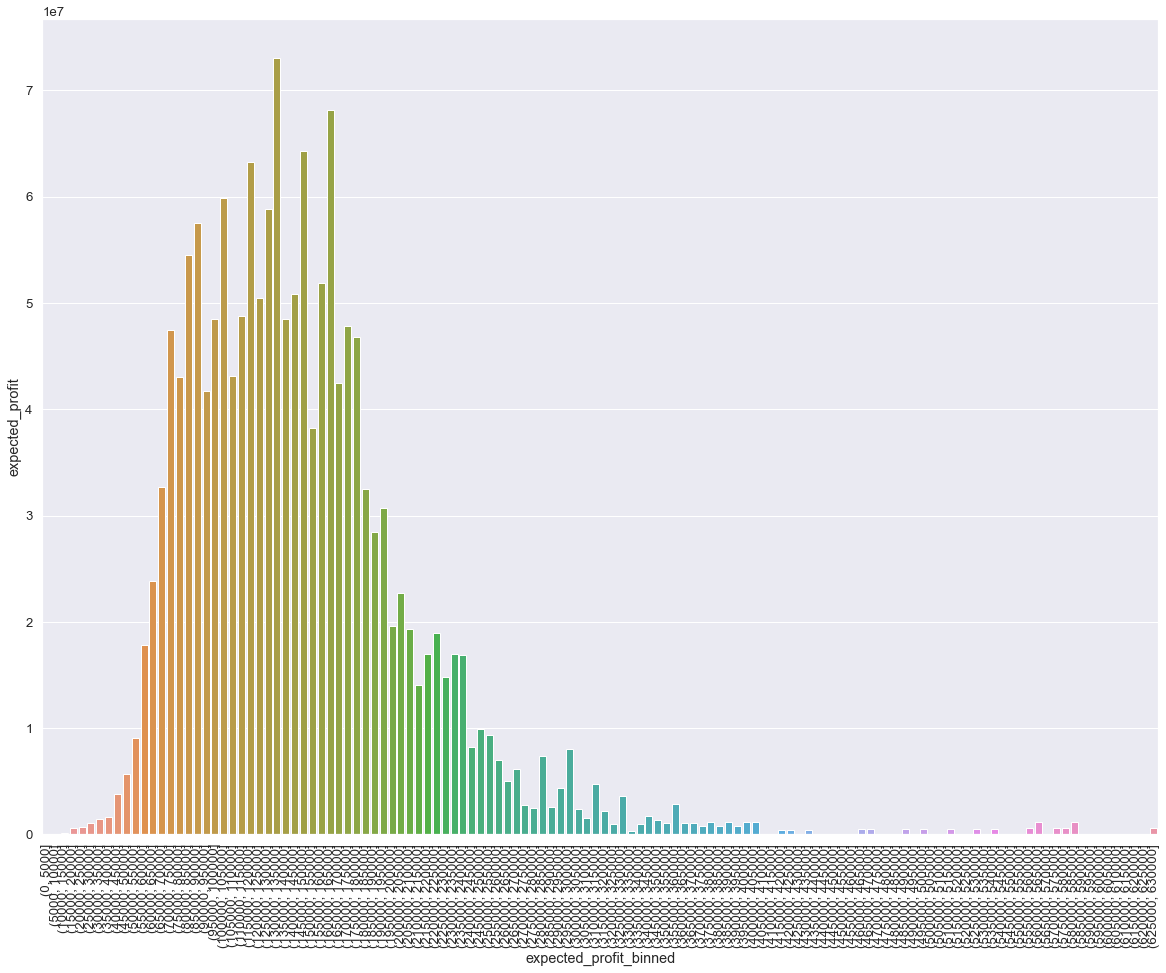

In [320]:
# profit_distribution
sns.barplot(data=a1, x='expected_profit_binned', y='expected_profit');
plt.xticks(rotation=90);

In [321]:
# comparision plot
#comparision, ax1 = plt.subplots()

# ax1.set_xlabel('expected profit binned')
# ax1.set_ylabel('number of properties')
# ax1.plot(a1['expected_profit_binned'], a1['id_'], color='tab:red')
# ax1.tick_params(axis='y')

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# ax2.set_ylabel('expected profit')  # we already handled the x-label with ax1
# ax2.plot(a1['expected_profit_binned'], a1['expected_profit'], color='tab:green')
# ax2.tick_params(axis='y')

# comparision.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.show()

In [322]:
# filtering data for better plot visualization

aux2 = df4[df4['expected_profit']!=0][['id', 'expected_profit']].copy()

bin_groups = list(np.arange(0,305000,5000)) # maximum profit = 630,000.00
aux2['expected_profit_binned'] = pd.cut(aux2['expected_profit'], bins=bin_groups)

aux2.head()

,id,expected_profit,expected_profit_binned
0,5561000190,"131,250.00","(130000, 135000]"
4,5056500260,"132,000.00","(130000, 135000]"
5,3438501320,"88,500.00","(85000, 90000]"
6,1737320120,"141,000.00","(140000, 145000]"
7,7197300105,"165,000.00","(160000, 165000]"


In [323]:
a2 = ( aux2.groupby('expected_profit_binned').agg(id_          = ('id', 'count'),
                                               expected_profit = ('expected_profit', 'sum')) ).reset_index()





a2.head()

,expected_profit_binned,id_,expected_profit
0,"(0, 5000]",0,0.00
1,"(5000, 10000]",6,"51,550.00"
2,"(10000, 15000]",14,"176,185.00"
3,"(15000, 20000]",33,"573,611.50"
4,"(20000, 25000]",31,"701,805.50"


In [324]:
a2.sort_values('id_', ascending=False).head()

,expected_profit_binned,id_,expected_profit
16,"(80000, 85000]",661,"54,504,310.70"
17,"(85000, 90000]",655,"57,557,274.90"
14,"(70000, 75000]",651,"47,469,928.50"
20,"(100000, 105000]",582,"59,907,629.10"
15,"(75000, 80000]",554,"43,031,773.50"


In [325]:
a2.sort_values('expected_profit', ascending=False).head()

,expected_profit_binned,id_,expected_profit
26,"(130000, 135000]",550,"73,056,579.90"
32,"(160000, 165000]",418,"68,165,804.10"
29,"(145000, 150000]",434,"64,245,276.60"
23,"(115000, 120000]",536,"63,248,474.10"
20,"(100000, 105000]",582,"59,907,629.10"


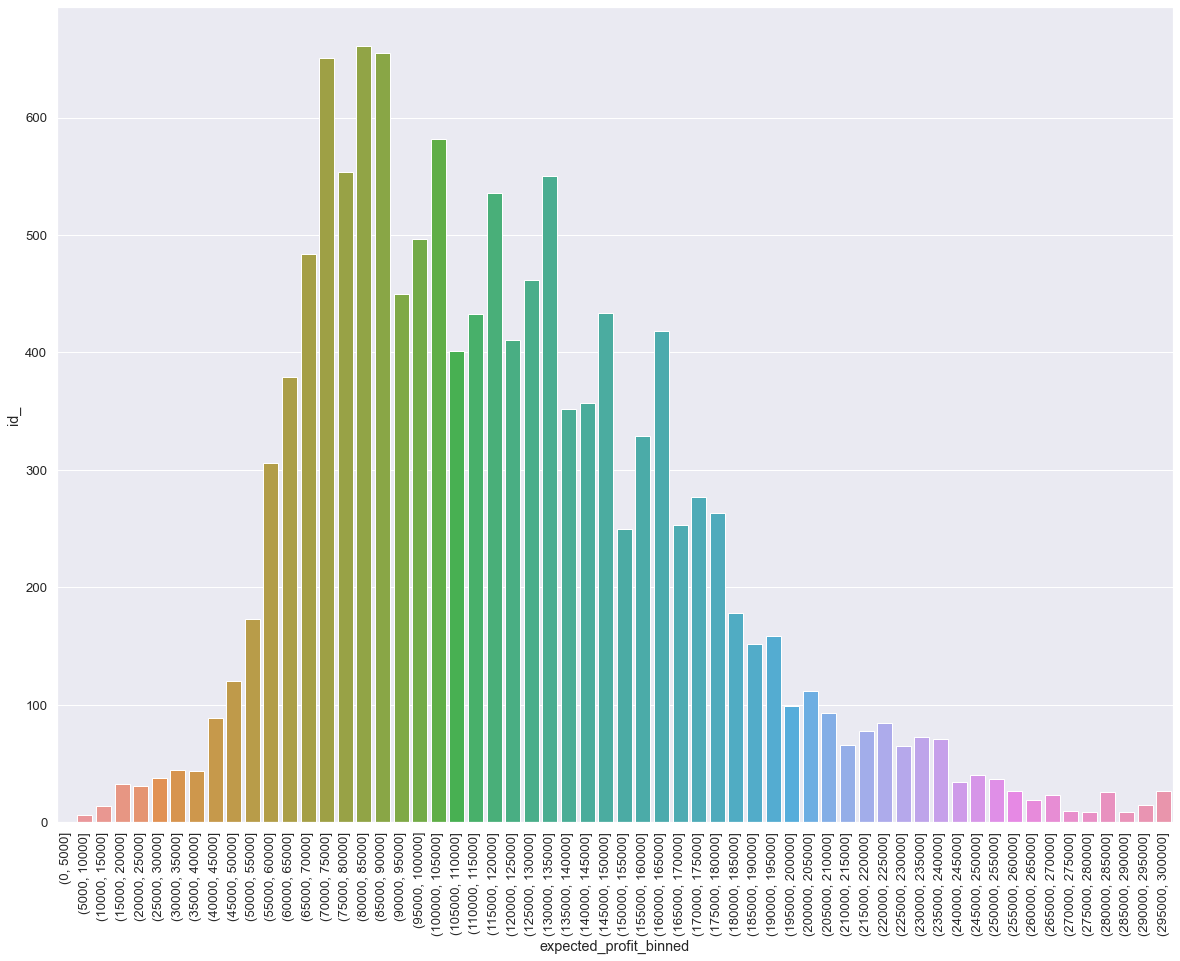

In [326]:
# id_distribution
sns.barplot(data=a2, x='expected_profit_binned', y='id_');
plt.xticks(rotation=90);

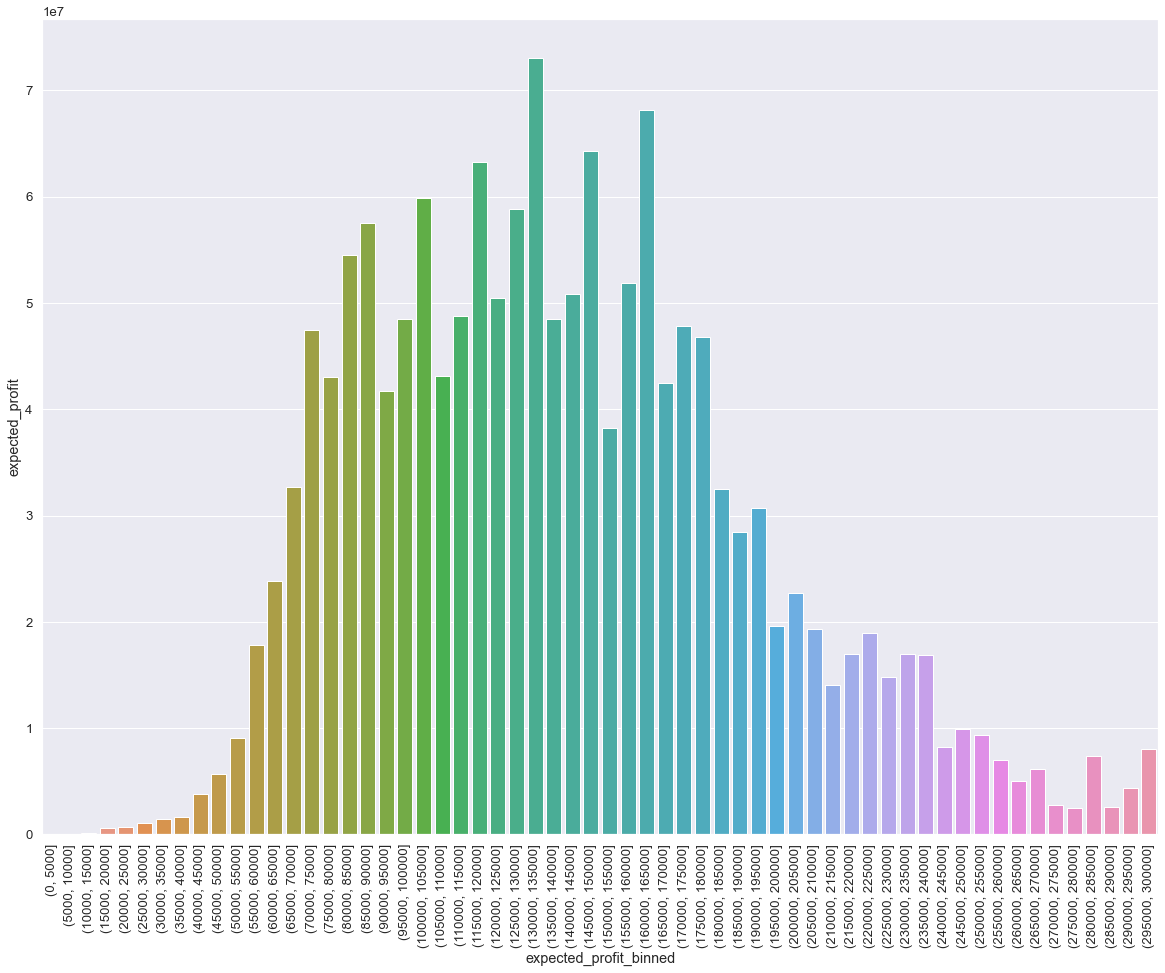

In [327]:
# profit_distribution
sns.barplot(data=a2, x='expected_profit_binned', y='expected_profit');
plt.xticks(rotation=90);

### Numerical Variables

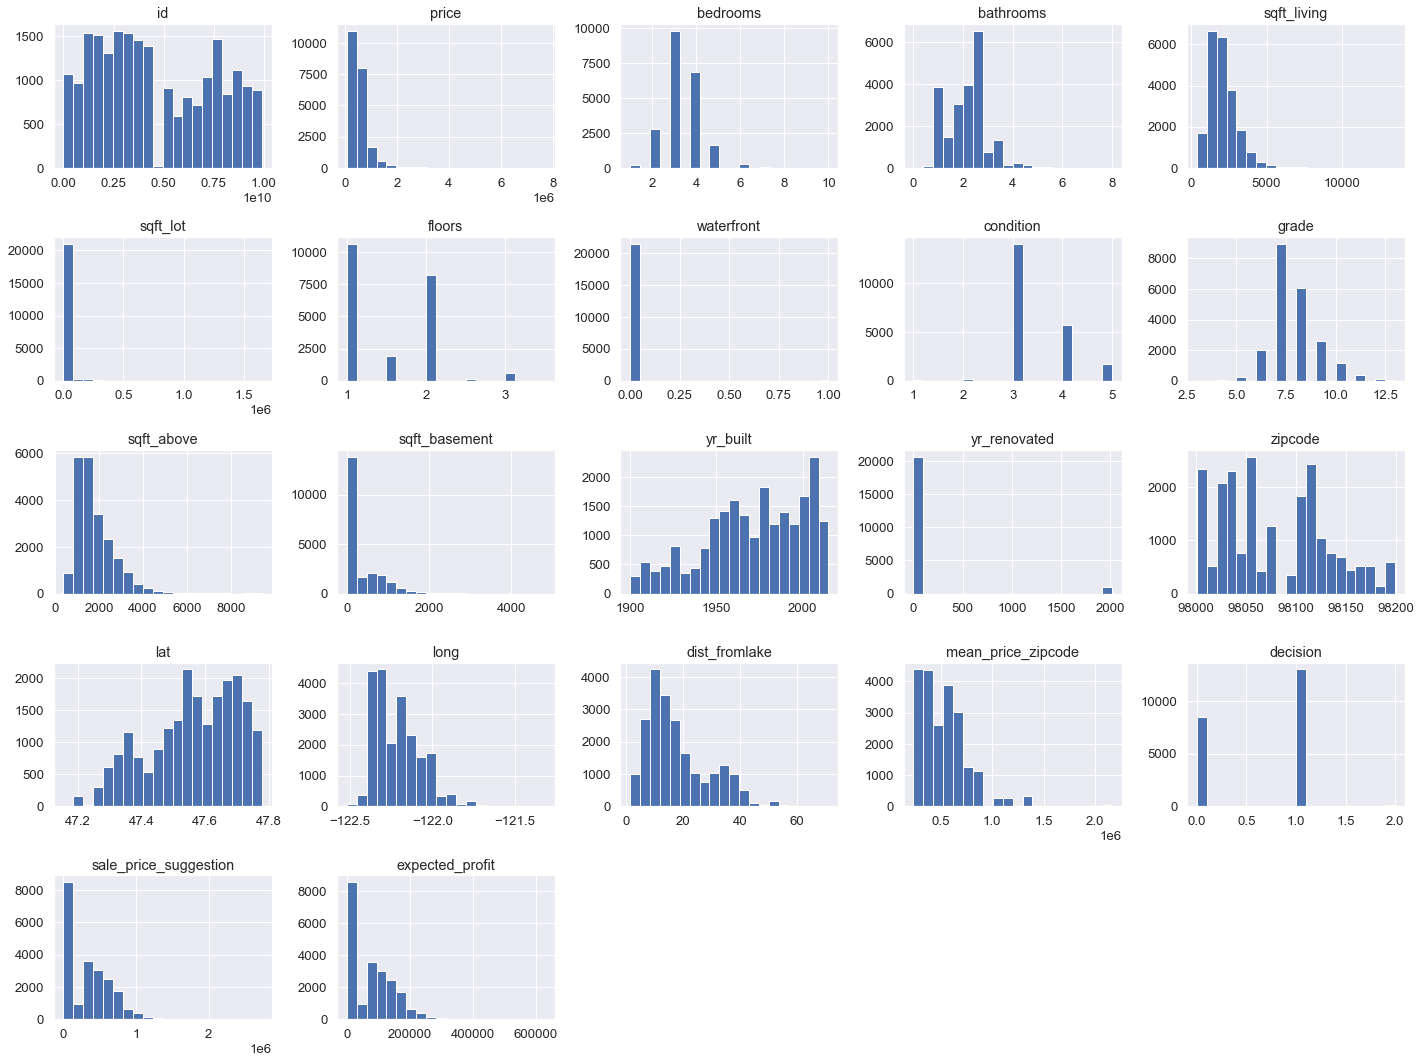

In [328]:
num_df4.hist(bins=20);
plt.tight_layout() 

### <font color ='red'>Categorical Variables

In [329]:
df41 = df4.copy()
print(cat_df4.dtypes)
cat_df4.head()

query            object
road             object
house_number     object
neighbourhood    object
city             object
county           object
state            object
season           object
dtype: object


,query,road,house_number,neighbourhood,city,county,state,season
0,"47.4635,-121.991",Southeast 154th Street,26069,NaN,NaN,King County,Washington,spring
1,"47.6833,-122.4",34th Avenue Northwest,7506,Sunset Hill,Seattle,King County,Washington,spring
2,"47.5794,-122.025",Southeast 32nd Way,23601,NaN,NaN,King County,Washington,spring
3,"47.515,-121.87",Southeast Terrace Street,35246,NaN,NaN,King County,Washington,spring
4,"47.5443,-122.177",Southeast 65th Street,12201,NaN,Bellevue,King County,Washington,spring


In [330]:
cat_df4.isna().sum()

query                0
road               219
house_number      1264
neighbourhood    14381
city             12557
county               0
state                0
season               0
dtype: int64

In [331]:
address = df41[['id', 'zipcode', 'road', 'house_number', 'neighbourhood', 'city', 'county']].copy()
address.head()

,id,zipcode,road,house_number,neighbourhood,city,county
0,5561000190,98027,Southeast 154th Street,26069,NaN,NaN,King County
1,472000620,98117,34th Avenue Northwest,7506,Sunset Hill,Seattle,King County
2,1024069009,98029,Southeast 32nd Way,23601,NaN,NaN,King County
3,7853361370,98065,Southeast Terrace Street,35246,NaN,NaN,King County
4,5056500260,98006,Southeast 65th Street,12201,NaN,Bellevue,King County


#### State

In [332]:
print('unique', df41['state'].unique())
print('NAs', df41['state'].isna().sum())

unique ['Washington']
NAs 0


#### City

In [333]:
print('unique', df41['city'].unique())
print('NAs', df41['city'].isna().sum())

unique [nan 'Seattle' 'Bellevue' 'Shoreline' 'Kent' 'King County']
NAs 12557


In [334]:
df41[['id', 'city']].groupby('city').count().sort_values('id', ascending=False).reset_index()

,city,id
0,Seattle,7079
1,Bellevue,1325
2,Shoreline,630
3,Kent,5
4,King County,2


Seattle, Bellevue, Shoreline and Kent **belong** to King County https://kingcounty.gov/depts/health/codes/cities.aspx

##### Checking 'King County' as 'city'

In [335]:
address[address['city']=='King County']

,id,zipcode,road,house_number,neighbourhood,city,county
11553,8075400570,98032,South 239th Street,3704,Midway,King County,King County
14475,8075400100,98032,41st Avenue South,23654,NaN,King County,King County


Zipcode 98032 belongs only to Kent city https://wa.postcodebase.com/zipcode5/98032

##### **Inputing 'Kent' as city to 98032 'zipcode'**

In [336]:
# checking unique values for 98032
df41[df41['zipcode']==98032]['city'].unique()

array([nan, 'Kent', 'King County'], dtype=object)

In [337]:
df41[df41['zipcode']==98032][['zipcode', 'city']].groupby('city').count().reset_index()

,city,zipcode
0,Kent,3
1,King County,2


In [338]:
df41[df41['zipcode']==98032][['city']].isna().sum()[0]

120

In [339]:
df41['city'] = df41.apply(lambda x: 'Kent' if x['zipcode']==98032 else x['city'], axis=1)

df41[df41['zipcode']==98032][['zipcode', 'city']].groupby('city').count().reset_index()

,city,zipcode
0,Kent,125


##### Filling NAs

In [340]:
print('NAs', df41['city'].isna().sum()) # city NAs

NAs 12437


In [341]:
address[address['city'].isna()].head()

,id,zipcode,road,house_number,neighbourhood,city,county
0,5561000190,98027,Southeast 154th Street,26069,NaN,NaN,King County
2,1024069009,98029,Southeast 32nd Way,23601,NaN,NaN,King County
3,7853361370,98065,Southeast Terrace Street,35246,NaN,NaN,King County
6,1737320120,98011,Northeast 195th Street,8915,NaN,NaN,King County
7,7197300105,98052,170th Avenue Northeast,9105,NaN,NaN,King County


In [342]:
# 'city' and 'neighourhood' NA
print(address[(address['city'].isna()) & (address['neighbourhood'].isna())].shape[0], 'both city and neighbourhood NA')
print(address[(address['city'].isna()) & (~address['neighbourhood'].isna())].shape[0], 'city NA and neighbourhood filled')

9185 both city and neighbourhood NA
3372 city NA and neighbourhood filled


In [343]:
# counting how many 'zipcode's to NaN 'city'
print('number of zipcodes:', address[address['city'].isna()][['zipcode', 'city']].groupby('zipcode').count().reset_index().shape[0])
address[address['city'].isna()][['zipcode', 'city']].groupby('zipcode').count().reset_index().head()

number of zipcodes: 52


,zipcode,city
0,98001,0
1,98002,0
2,98003,0
3,98004,0
4,98006,0


#### County

In [344]:
print('unique', df41['county'].unique())
print('NAs', df41['county'].isna().sum())

unique ['King County' 'Snohomish County' 'Pierce County']
NAs 0


In [345]:
df41[['id', 'county']].groupby('county').count().sort_values('id', ascending=False).reset_index()

,county,id
0,King County,21581
1,Pierce County,15
2,Snohomish County,2


The city of Seattle belongs to the multi-counties: King County and Snohomish County. https://wa.postcodebase.com/city/SEATTLE

##### **Investigating 'Pierce County'**

In [346]:
a = address[address['county']=='Pierce County'].sort_values('zipcode', ascending=True)
a

,id,zipcode,road,house_number,neighbourhood,city,county
2181,3275300040,98003,17th Avenue,99,NaN,NaN,Pierce County
6714,7153400010,98003,Alder Street,2286,NaN,NaN,Pierce County
6953,3275330120,98003,19th Avenue,63,NaN,NaN,Pierce County
9107,5409800120,98003,23rd Avenue South,77,NaN,NaN,Pierce County
12660,3275300440,98003,17th Avenue,77,NaN,NaN,Pierce County
12841,3275300050,98003,17th Avenue,95,NaN,NaN,Pierce County
15020,5409800110,98003,23rd Avenue South,77,NaN,NaN,Pierce County
16075,5409800140,98003,23rd Avenue South,81,NaN,NaN,Pierce County
3395,9413400165,98022,Lumpy Lane East,52435,NaN,NaN,Pierce County
12704,3518000180,98023,58th Avenue Northeast,35017,Northeast Tacoma,NaN,Pierce County


In [347]:
# checking 'zipcode' for 'Pierce County'
a['zipcode'].sort_values(ascending=True).unique()

array([98003, 98022, 98023, 98092], dtype=int64)

✔️ **98003**
Federal Way. County King County  https://wa.postcodebase.com/zipcode5/98003

✔️ **98022**
Zipcode 98022 is across counties/cities. City ENUMCLAW. Counties King County and Pierce County https://wa.postcodebase.com/zipcode5/98022

✔️ **98023**
Federal Way.  County King County https://wa.postcodebase.com/zipcode5/98023

✔️ **98092**
Zipcode 98092 is across counties/cities. City AUBURN. Counties King County and Pierce County https://wa.postcodebase.com/zipcode5/98092

#### House number and Road

In [348]:
# house_number      1264
# neighbourhood    14381

#### Try to Fill NAs if relevant (do it later)

In [349]:
cat_df4 = df41.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

In [350]:
cat_df4.isna().sum()

query                0
road               219
house_number      1264
neighbourhood    14381
city             12437
county               0
state                0
season               0
dtype: int64

In [351]:
# filling NAs

# == before
# road               219
# house_number      1264
# neighbourhood    14381
# city             12557

# == after
# road               219
# house_number      1264
# neighbourhood    14381
# city             12437

In [219]:
address.head()

,id,zipcode,road,house_number,neighbourhood,city,county
0,5561000190,98027,Southeast 154th Street,26069,NaN,NaN,King County
1,472000620,98117,34th Avenue Northwest,7506,Sunset Hill,Seattle,King County
2,1024069009,98029,Southeast 32nd Way,23601,NaN,NaN,King County
3,7853361370,98065,Southeast Terrace Street,35246,NaN,NaN,King County
4,5056500260,98006,Southeast 65th Street,12201,NaN,Bellevue,King County


## <font color='red'> Bivariate Analysis

In [352]:
df42=df41.copy()

In [357]:
df42.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,query,road,house_number,neighbourhood,city,county,state,season,dist_fromlake,mean_price_zipcode,decision,sale_price_suggestion,expected_profit
0,5561000190,2014-05-02,"437,500.00",3,2.25,1970,35100,2.00,0,4,9,1970,0,1977,0,98027,47.46,-121.99,"47.4635,-121.991",Southeast 154th Street,26069,NaN,NaN,King County,Washington,spring,28.18,"616,990.59",1,"568,750.00","131,250.00"
1,472000620,2014-05-02,"790,000.00",3,2.50,2600,4750,1.00,0,4,9,1700,900,1951,0,98117,47.68,-122.40,"47.6833,-122.4",34th Avenue Northwest,7506,Sunset Hill,Seattle,King County,Washington,spring,11.55,"579,661.28",0,0.00,0.00
2,1024069009,2014-05-02,"675,000.00",5,2.50,2820,67518,2.00,0,3,8,2820,0,1979,0,98029,47.58,-122.03,"47.5794,-122.025",Southeast 32nd Way,23601,NaN,NaN,King County,Washington,spring,18.84,"612,678.53",0,0.00,0.00
3,7853361370,2014-05-02,"555,000.00",4,2.50,3310,6500,2.00,0,3,8,3310,0,2012,0,98065,47.52,-121.87,"47.515,-121.87",Southeast Terrace Street,35246,NaN,NaN,King County,Washington,spring,32.38,"529,982.49",0,0.00,0.00
4,5056500260,2014-05-02,"440,000.00",4,2.25,2160,8119,1.00,0,3,8,1080,1080,1966,0,98006,47.54,-122.18,"47.5443,-122.177",Southeast 65th Street,12201,NaN,Bellevue,King County,Washington,spring,12.38,"860,973.78",1,"572,000.00","132,000.00"


1. Properties that have water view are 50% more expensive.
2. Properties with basements have higher grade.
3. Properties with basements have bigger interior living space.
4. Properties with basements are 15% more expensive.
4. Properties built with basements decreased over the years.
5. Properties with 1 to 2 bathrooms are 20% more expensive than those with up to 1 bathroom.
6. Properties with 3 bedrooms are 25% more expensive than those which have 2 bedrooms.
7.  Properties with 2 floors are 15% more expensive than those with 1 floor.
8. Properties that were not renovated are 40% cheaper.
9. Properties that were not renovated in the last 5 years are 15% cheaper.
10. Properties that were built in the last 5 years are cheaper than properties that were renovated in the last 5 years.
11. Most properties (+50%) became available during summer/spring.
12. Properties available during summer/spring are 20% more expensive.
13. More than half properties are localized in a 15km radio from the lake.
14. Properties selected to be bought that are localized in a 15km radio from the lake results on 20% more profit.
1. Properties are more expensive along construction year timeline.

pensar em mais hipóteses de acordo com o tempo, data, ano etc

In [520]:
# hypothesis overview
tab = [ ['Hypothesis', 'Result', 'Relevance', 'Conclusion'],
        ['H01','False','High'  , 'Properties that have water view are more than 200% more expensive.'],
        ['H02','True' ,'Low'   , 'Properties with basements have a slightly lower grade.'],
        ['H03','True' ,'Medium', 'Properties with basement have bigger interior living space on average.'],
        ['H04','False','High'  , 'Properties with basement are 27.84 % more expensive.'],
        ['H05','True' ,'High'  , 'Properties built with basements decreased after the 80s.'],
        ['H06','False','High'  , 'Properties with 1 to 2 bathrooms are 67.55 % more expensive than those with up to 1 bathroom.'],
        ['H07','False','Medium', 'Properties with 3 bedrooms are 16.10% more expensive than those which have 2 bedrooms.'],
        ['H08','False','High'  , 'Properties with 2 floors are 29.25 % more expensive than those with 1 floor.'],
        ['H09','True' ,'High'  , 'Properties that were not renovated are 43.17 % cheaper.'],
        ['H10','','High'],
        ['H11','','High'],
        ['H12','','High'],
        ['H13','','High'],
        ['H14','','High'],
        ['H15','','High'],
      ]

print(tabulate(tab, headers='firstrow', colalign=['center','center','center','left']))

 Hypothesis    Result    Relevance   Conclusion
------------  --------  -----------  ---------------------------------------------------------------------------------------------
    H01        False       High      Properties that have water view are more than 200% more expensive.
    H02         True        Low      Properties with basements have a slightly lower grade.
    H03         True      Medium     Properties with basement have bigger interior living space on average.
    H04        False       High      Properties with basement are 27.84 % more expensive.
    H05         True       High      Properties built with basements decreased after the 80s.
    H06        False       High      Properties with 1 to 2 bathrooms are 67.55 % more expensive than those with up to 1 bathroom.
    H07        False      Medium     Properties with 3 bedrooms are 16.10% more expensive than those which have 2 bedrooms.
    H08        False       High      Properties with 2 floors are 29.25 % more

### Properties that have water view are 50% more expensive.
**False:** Properties that have water view are more than 200% more expensive.

In [363]:
a = df42[['waterfront', 'price']].groupby('waterfront').mean().reset_index()
print(a)

hasnot_waterfront = a.iloc[0,1]
has_waterfront = a.iloc[1,1]

percentage = abs( ((has_waterfront - hasnot_waterfront) / hasnot_waterfront)*100 )
print('\nProperties that have water view are', '{:,.2f}'.format(percentage),'% more expensive')

   waterfront        price
0           0   532,755.38
1           1 1,661,876.02

Properties that have water view are 211.94 % more expensive


### Properties with basements have higher grade.
**True:** Properties with basements have a <font color ='blue'> slightly <font color='black'> lower grade.

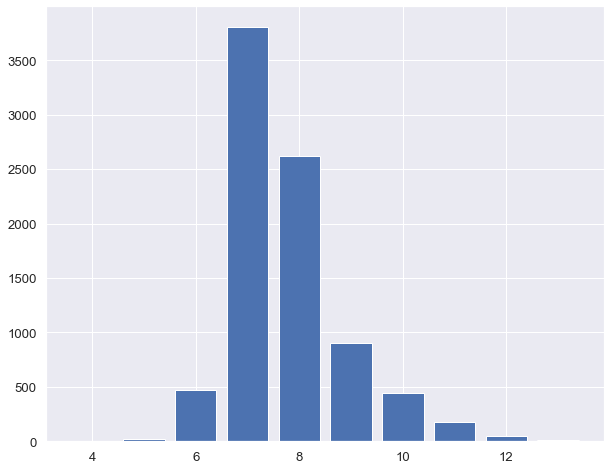

In [367]:
# properties with basement

a = df42[df42['sqft_basement']!=0][['id', 'grade', 'sqft_basement']].copy()
#print(a.head(), '\n')
#print(a.shape)

has_basement = a[['id','grade']].groupby('grade').count().reset_index()
plt.bar(has_basement['grade'], has_basement['id'])
plt.rcParams['figure.figsize'] = (10,8)

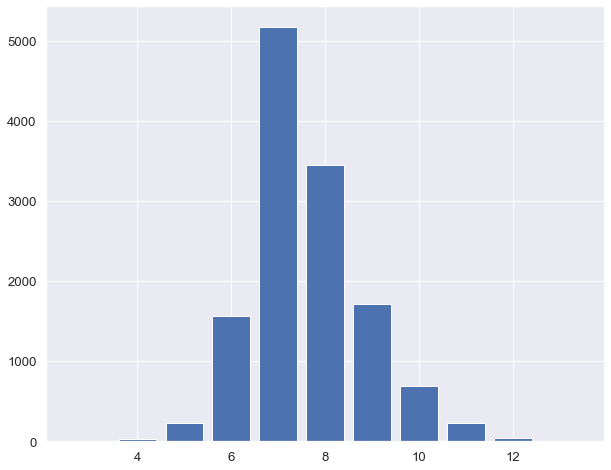

In [368]:
# properties without basement

a = df42[df42['sqft_basement']==0][['id', 'grade', 'sqft_basement']].copy()
#print(a.head(), '\n')
#print(a.shape)

hasnot_basement = a[['id','grade']].groupby('grade').count().reset_index()
plt.bar(hasnot_basement['grade'], hasnot_basement['id'])
plt.rcParams['figure.figsize'] = (10,8)

In [369]:
# weighted average mean
w_avg_has = np.average(np.array(has_basement['grade']), weights=np.array(has_basement['id']))
print('Weighted Average for properties with basement:', w_avg_has)

w_avg_hasnot = np.average(np.array(hasnot_basement['grade']), weights=np.array(hasnot_basement['id']))
print('Weighted Average for properties without basement:', w_avg_hasnot)

print('\nSmall difference, not relevant')

Weighted Average for properties with basement: 7.732822628167354
Weighted Average for properties without basement: 7.608785175017158

Small difference, not relevant


### Properties with basements have bigger interior living space.
**True:** Properties with basement have bigger interior living space on average.

In [407]:
has_basement = df42[df42['sqft_basement']!=0][['sqft_living']].mean()
has_basement

sqft_living   2,313.47
dtype: float64

In [408]:
hasnot_basement = df42[df42['sqft_basement']==0][['sqft_living']].mean()
hasnot_basement

sqft_living   1,929.10
dtype: float64

### Properties with basements are 15% more expensive.
**False:** Properties with basement are 27.84 % more expensive.

In [486]:
has_basement = df42[df42['sqft_basement']!=0][['price']].mean()[0]
print('Average price of properties with basement:', has_basement)

hasnot_basement = df42[df42['sqft_basement']==0][['price']].mean()[0]
print('Average price of properties without basement:', hasnot_basement)

percentage = abs( ((has_basement - hasnot_basement) / hasnot_basement)*100 )
print('Properties with basement are', '{:,.2f}'.format(percentage),'% more expensive.')

Average price of properties with basement: 623736.1916322922
Average price of properties without basement: 487920.05437352246
Properties with basement are 27.84 % more expensive.


### Properties built with basements decreased over the years.
**True:** Properties built with basements decreased after the 80s.

In [457]:
p = df42[['id', 'yr_built']].groupby('yr_built').count().reset_index()
p.head()

,yr_built,id
0,1900,87
1,1901,29
2,1902,27
3,1903,46
4,1904,45


In [458]:
b = df42[df42['sqft_basement']!=0][['sqft_basement','yr_built']].groupby('yr_built').count().reset_index()
b.head()

,yr_built,sqft_basement
0,1900,29
1,1901,11
2,1902,5
3,1903,10
4,1904,21


In [446]:
comparision = pd.merge(p, b, on='yr_built', how='left').rename(columns={'id': 'properties', 'sqft_basement': 'has_b'})
comparision['hasnot_b'] = comparision['properties'] - comparision['has_b']
comparision.sample()

,yr_built,properties,has_b,hasnot_b
39,1939,106,65,41


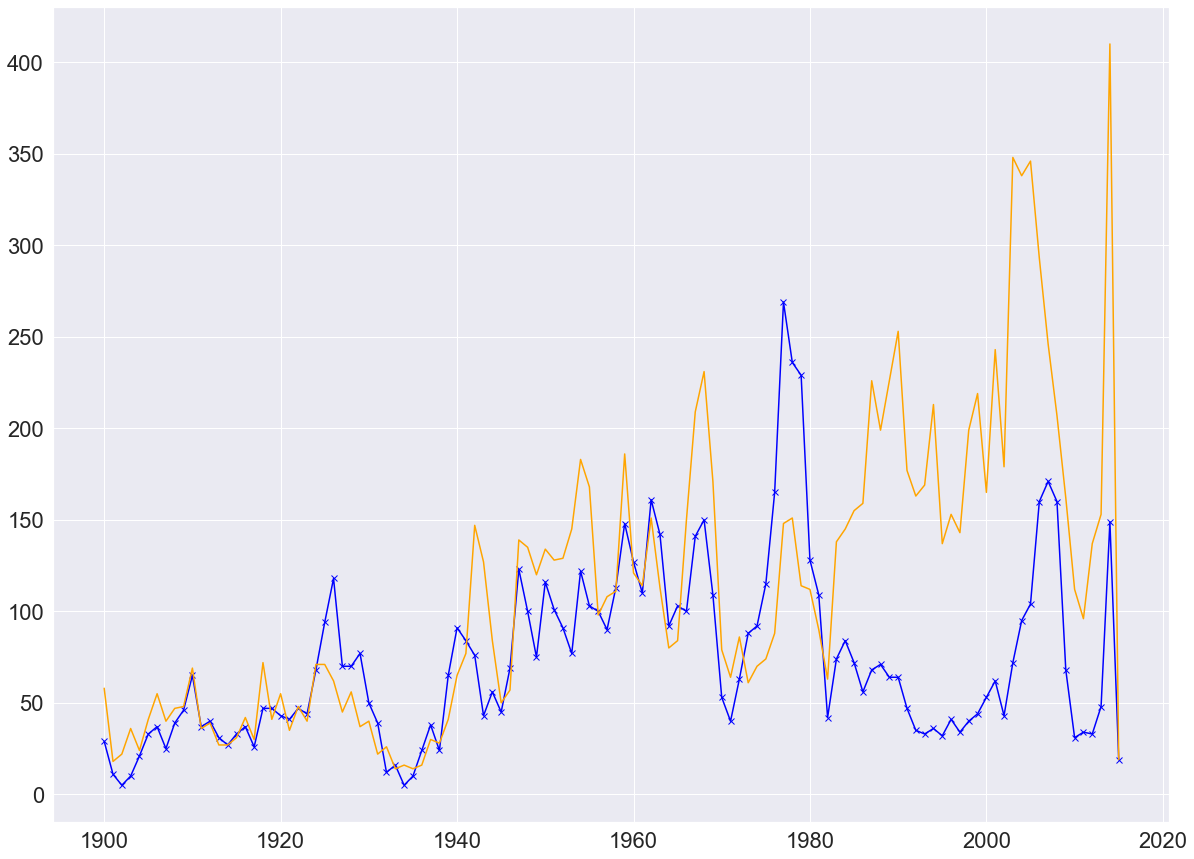

In [497]:
plt.plot(comparision['yr_built'], comparision['has_b'], color='blue', marker='x')
plt.plot(comparision['yr_built'], comparision['hasnot_b'], color='orange')
plt.show()

### Properties with 1 to 2 bathrooms are 20% more expensive than those with up to 1 bathroom.
**False:** Properties with 1 to 2 bathrooms are 67.55 % more expensive than those with up to 1 bathroom.

In [477]:
a = df42[['id', 'bathrooms', 'price']].copy()
a.head()

b = (a.groupby('bathrooms').agg(id_       = ('id', 'count'),
                                avg_price = ('price', 'mean'))).reset_index()

b1 = b[b['bathrooms']<=1] # up to 1 bathroom
b1_mean = b1['avg_price'].mean()
print('Average price of properties with up to 1 bathroom', b1_mean)

b2 = b[(b['bathrooms']>1) & (b['bathrooms']<=2)] # 1 to 2 bathrooms
b2_mean = b2['avg_price'].mean()
print('Average price of properties with 1 to 2 bathroom', b2_mean)

percentage = abs( ((b2_mean - b1_mean) / b1_mean)*100 )
print('Properties with 1 to 2 bathrooms are', '{:,.2f}'.format(percentage),'% more expensive.')

Average price of properties with up to 1 bathroom 290641.98980845173
Average price of properties with 1 to 2 bathroom 486960.05429471104
Properties with 1 to 2 bathrooms are 67.55 % more expensive.


### Properties with 3 bedrooms are  25% more expensive than those which have 2 bedrooms.
**False:** Properties with 3 bedrooms are 16.10% more expensive than those which have 2 bedrooms.

In [490]:
a = df42[['id', 'bedrooms', 'price']].copy()
a.head()

b = (a.groupby('bedrooms').agg(id_       = ('id', 'count'),
                               avg_price = ('price', 'mean'))).reset_index()

b2 = b.iloc[1,2]
b3 = b.iloc[2,2]

print('Average price of properties with 2 bedrooms is', b2)
print('Average price of properties with 3 bedrooms is', b3)

percentage = abs( ((b3 - b2) / b2)*100 )
print('Properties with 3 bedrooms are ', '{:,.2f}'.format(percentage),'% more expensive than those which have 2 bedrooms.')

Average price of properties with 2 bedrooms is 402666.2144927536
Average price of properties with 3 bedrooms is 467491.715492671
Properties with 3 bedrooms are  16.10 % more expensive than those which have 2 bedrooms.


### Properties with 2 floors are 15% more expensive than those with 1 floor. 
**False:** Properties with 2 floors are 29.25 % more expensive than those with 1 floor.

In [498]:
a = df42[['id', 'floors', 'price']].copy()
a.head()

b = (a.groupby('floors').agg(id_       = ('id', 'count'),
                             avg_price = ('price', 'mean'))).reset_index()
b.head()

f1 = b[b['floors']<2] # less than 2 floors
f1_mean = f1['avg_price'].mean()
print('Average price of properties with less than 2 floors', f1_mean)

f2= b[b['floors']==2] # with 2 floors
f2_mean = f2['avg_price'].mean()
print('Average price of properties with 2 floors', f2_mean)

percentage = abs( ((f2_mean - f1_mean) / f1_mean)*100 )
print('Properties with 2 floors are', '{:,.2f}'.format(percentage),'% more expensive than those with 1 floor.')

Average price of properties with less than 2 floors 502454.562849173
Average price of properties with 2 floors 649419.5290259898
Properties with 2 floors are 29.25 % more expensive than those with 1 floor.


### Properties that were not renovated are 40% cheaper.
**True:** Properties that were not renovated are 43.17% cheaper.

In [521]:
a = df42[['id', 'price', 'yr_renovated']].copy()

a['was_renovated'] = a.apply(lambda x: 0 if x['yr_renovated']==0 else 1, axis=1)

b = a[['was_renovated', 'price']].groupby('was_renovated').mean().reset_index()

wasnot_renovated = b.iloc[0,1]
was_renovated = b.iloc[1,1]

print('Average price of properties that were not renovated:', wasnot_renovated)
print('Average price of properties that were renovated:', was_renovated)

percentage = abs( ((was_renovated - wasnot_renovated) / wasnot_renovated)*100 )
print('Properties that were not renovated are', '{:,.2f}'.format(percentage),'% cheaper.')

Average price of properties that were not renovated: 531576.8540488277
Average price of properties that were renovated: 761040.5618838993
Properties that were not renovated are 43.17 % cheaper.


### <font color='red'>Properties that were not renovated in the last 5 years are 15% cheaper

In [537]:
r = df42[df42['yr_renovated']!=0][['id', 'yr_renovated']].groupby('yr_renovated').count().reset_index()
r.head()

,yr_renovated,id
0,1934,1
1,1940,2
2,1944,1
3,1945,3
4,1946,2


In [538]:
not_r = df42[['id', 'yr_built']].groupby('yr_built').count().reset_index()
not_r.head()

,yr_built,id
0,1900,87
1,1901,29
2,1902,27
3,1903,46
4,1904,45


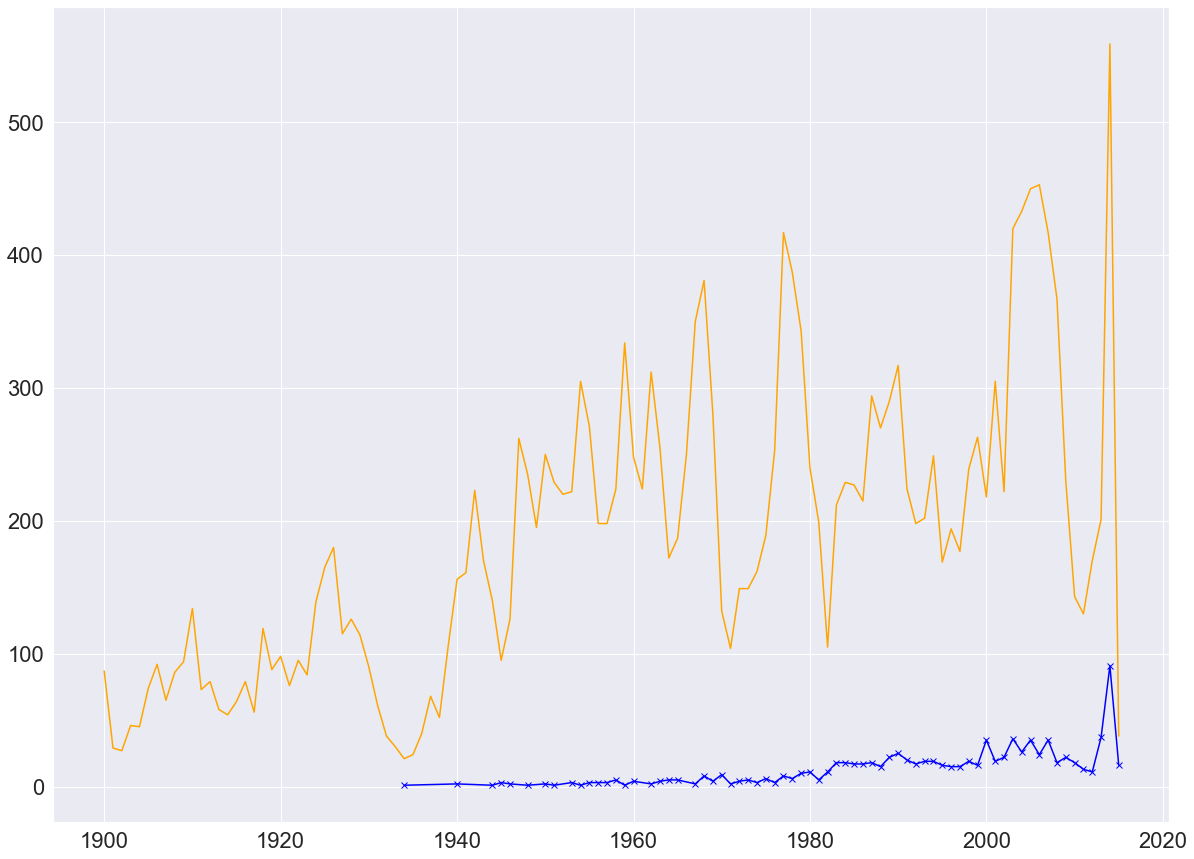

In [541]:
plt.plot(r['yr_renovated'], r['id'], color='blue', marker='x')
plt.plot(not_r['yr_built'], not_r['id'], color='orange')
plt.show()

### Properties that were built in the last 5 years are cheaper than properties that were renovated in the last 5 years

### Most properties (+50%) became available during summer/spring
**True:** Almost 60% of the properties became available during summer/spring

In [250]:
a = df4[['season', 'id']].copy()

a['SS_AW'] = a.apply(lambda x: 'SS' if x['season']=='summer' 
                          else 'SS' if x['season']=='spring' else 'AW', axis=1)


b = a[['SS_AW', 'id']].groupby('SS_AW').count().sort_values('id', ascending=False).reset_index()
b['cumultive_%']=b['id'].cumsum()/b['id'].sum()*100
b.head()

,SS_AW,id,cumultive_%
0,SS,13142,59.86
1,AW,8812,100.00


### Properties available during summer/spring are 20% more expensive.

In [251]:
a = df4[['id', 'season', 'price']].copy()

a['SS_AW'] = a.apply(lambda x: 'SS' if x['season']=='summer' 
                          else 'SS' if x['season']=='spring' else 'AW', axis=1)

a.sample(5)

,id,season,price,SS_AW
10949,2473002650,spring,"495,000.00",SS
14285,4051100230,summer,"240,000.00",SS
9171,2597450120,winter,"965,000.00",AW
11891,6899990200,summer,"720,000.00",SS
894,3826000070,spring,"185,000.00",SS


In [253]:
b_SS = a[a['season']=='SS']
w_avg_SS = np.average(np.array(b_SS['price']), weights=np.array(b_SS['id']))
print(w_avg_SS)

w_avg_AW = np.average(np.array(a['price']), weights=np.array(a['id']))

ZeroDivisionError: Weights sum to zero, can't be normalized

In [ ]:
# profit overview by season
a = ( df4[['id','price','expected_profit','season']].groupby('season')
                                                  .agg(id_   = ('id', 'count'),
                                                       price  = ('price', 'mean'),
                                                       profit = ('expected_profit', 'sum')).reset_index() )
a.sort_values('profit', ascending=False)

In [254]:
b = (a.groupby('SS_AW').agg(id_          = ('id', 'count'),
                            price_min    = ('price', 'min'),
                            price_max    = ('price', 'max'),
                            price_median = ('price', 'median'),
                            price_mean   = ('price', 'mean')) ).sort_values('price_mean', ascending=False).reset_index()

SS_mean = b.iloc[0,5]
AW_mean = b.iloc[1,5]

percentage = abs( ((SS_mean - AW_mean) / SS_mean)*100 )
print('Properties with available during Summer/Spring are', '{:,.2f}'.format(percentage),'% more expensive')





b.head()

Properties with available during Summer/Spring are 4.33 % more expensive


,SS_AW,id_,price_min,price_max,price_median,price_mean
0,SS,13142,"78,000.00","7,062,500.00","459,995.00","547,686.26"
1,AW,8812,"75,000.00","7,700,000.00","435,000.00","523,975.97"


### Most properties (+50%) are localized in a 15km radio from the lake.
**True:** 50% of the properties are localized in a 15km radio from the lake.

In [ ]:
a = df4[['id', 'dist_fromlake']].copy()

bin_groups = list(np.arange(0,75,15)) # maximum dist =~ 71
a['dist_fromlake_binned'] = pd.cut(a['dist_fromlake'], bins=bin_groups)

b = a[['dist_fromlake_binned', 'id']].groupby('dist_fromlake_binned').count().sort_values('id', ascending=False).reset_index()

b['cumultive_%']=b['id'].cumsum()/b['id'].sum()*100

b.head()

### Most of properties (+50%) that should be bought are in a 15km radius from the lake
**True:** 50% of properties that should be bought are in a 15km radius from the lake

In [ ]:
a = df4[df4['decision']!=0][['id', 'dist_fromlake', 'decision']].copy()

bin_groups = list(np.arange(0,75,15)) # maximum dist =~ 71 km
a['dist_fromlake_binned'] = pd.cut(a['dist_fromlake'], bins=bin_groups)
a.head()

b = a[['dist_fromlake_binned', 'decision']].groupby('dist_fromlake_binned').count().sort_values('decision', ascending=False).reset_index()

b['cumultive_%']=b['decision'].cumsum()/b['decision'].sum()*100

b.head()

### Properties selected to be bought that are localized in a 15km radio from the lake results on 30% more profit on average
**True:** Properties in a 15km radius from the lake results on 30% more profit on average

In [ ]:
a = df4[df4['expected_profit']!=0][['id', 'dist_fromlake', 'expected_profit']].copy()

bin_groups = list(np.arange(0,75,15)) # maximum dist =~ 71
a['dist_fromlake_binned'] = pd.cut(a['dist_fromlake'], bins=bin_groups)
a.head()

b = ( a[['dist_fromlake_binned', 'expected_profit']].groupby('dist_fromlake_binned')
                                                .agg(profit_min    = ('expected_profit', 'min'),
                                                     profit_max    = ('expected_profit', 'max'),
                                                     profit_median = ('expected_profit', 'median'),
                                                     profit_mean   = ('expected_profit', 'mean') ) ).reset_index()
b.head()

In [ ]:
b['profit_diff_%']=0
b['profit_diff_%'][0] = 0
b['profit_diff_%'][1] = -((b.iloc[0,4] / b.iloc[1,4])-1)*100
b['profit_diff_%'][2] = -((b.iloc[0,4] / b.iloc[2,4])-1)*100
b['profit_diff_%'][3] = -((b.iloc[0,4] / b.iloc[3,4])-1)*100


b.head()

#### lixinho

In [ ]:
# df3[df3['sqft_basement']>0]['bathrooms'].unique()

# df3[['sqft_basement','sqft_above','sqft_living','sqft_lot','bedrooms','bathrooms']].sample(10)

In [68]:
a = df3[['date','season']].groupby('season').count().reset_index()
#a['percentage'] = a.loc['date']/a['date'].shape[0]
a

,season,date
0,autumn,4998
1,spring,6926
2,summer,6216
3,winter,3814


C:\Users\Mariana\Documents\anaconda3\envs\pythonDS\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='dist_fromlake', ylabel='Density'>

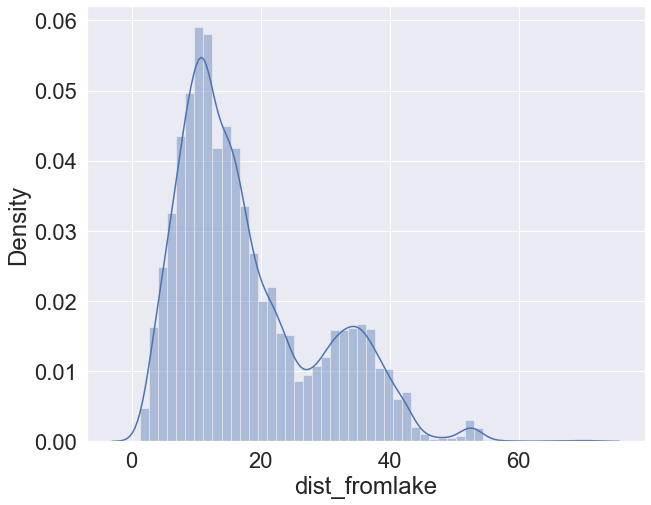

In [69]:
df3[df3['dist_fromlake']>=20][['id','dist_fromlake']].shape[0]
df3[df3['dist_fromlake']<=20][['id','dist_fromlake']].shape[0]
sns.distplot(df3['dist_fromlake'], kde=True)

C:\Users\Mariana\Documents\anaconda3\envs\pythonDS\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dist_fromlake'>

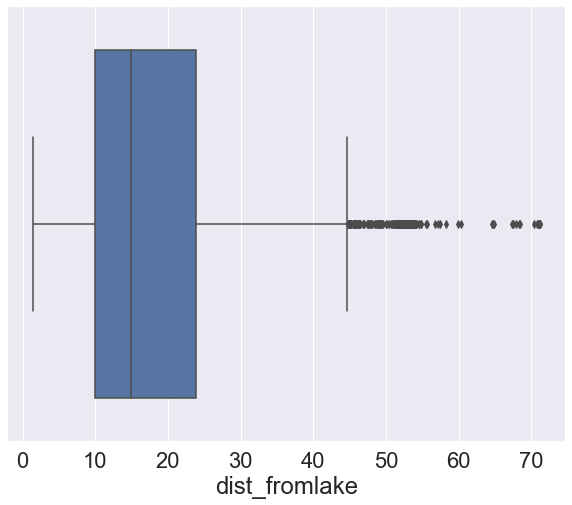

In [70]:
sns.boxplot(df3['dist_fromlake'])

In [71]:
# 80% property zone
# a = df[['id','neighbourhood']].groupby('neighbourhood').count().sort_values('id',ascending=False).reset_index()
# a ['cum_percentage'] = a['id'].cumsum()/a['id'].sum()*100
# a

# fig, axes = plt.subplots()
# ax1 = a.plot(use_index=True, x='neighbourhood', y='id',  kind='bar', ax=axes)
# ax2 = a.plot(use_index=True, x='neighbourhood', y='cum_percentage', marker='D', color="C1", kind='line', ax=axes, secondary_y=True)
# ax2.set_ylim([0,110])

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

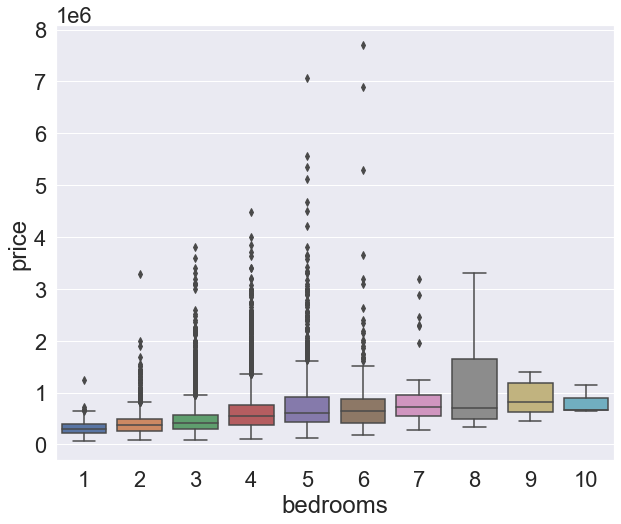

In [72]:
sns.boxplot (x='bedrooms' ,y='price' ,data=df4)

## Multivariate Analysis

In [247]:
df43=df42.copy()

### Numerical Attributes

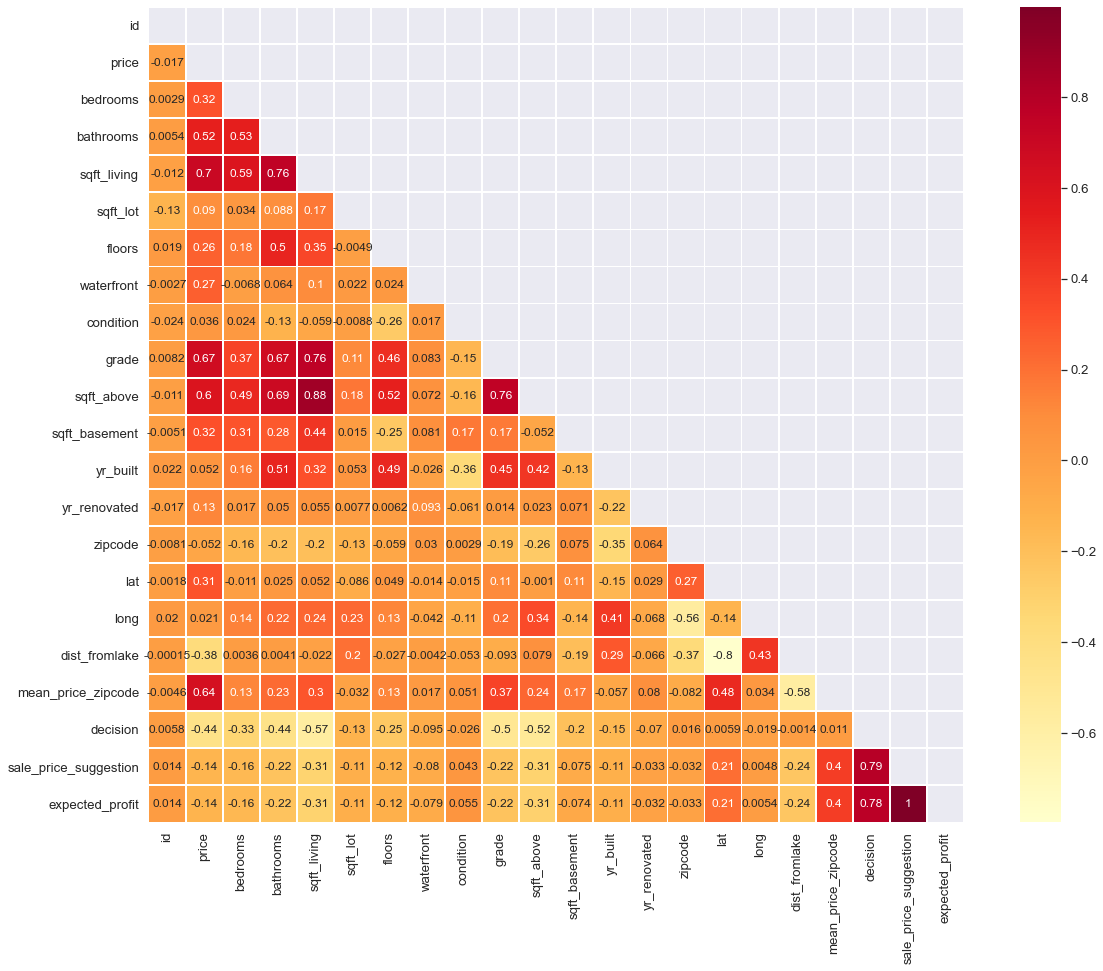

In [310]:
correlation = num_df4.corr(method='pearson')

corr_mask = np.triu(corr)

sns.set(font_scale=1.2)
sns.heatmap(corr, 
            cmap='YlOrRd', 
            annot=True, 
            annot_kws={'fontsize':'small'},
            fmt='.2g',
            linewidths=0.8, 
            square=True, 
            mask=corr_mask);

In [306]:
price
0.52 bathrooms
0.70 sqft_living
0.67 grade
0.61 sqft_above
0.64 mean_price_zipcode

Sqft_living
0.70 price
0.59 bedrooms
0.76 bathrooms
0.76 grade
0.88 grade
-0.57 decision

grade
0.60 price
0.69 bathrooms
0.88 sqft_living
0.52 floors
0.76 grade

decision
- 0.57 sqft_living
- 0.52 sqft_above

dist_fromlake
- 0.8 zipcode

SyntaxError: invalid syntax (<ipython-input-306-7bf20401dbd4>, line 1)

In [305]:
corr.where( ((corr <= -0.5) | (corr >=0.5 )) & (corr != 1) , other='')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,dist_fromlake,mean_price_zipcode,decision,sale_price_suggestion,expected_profit
id,,,,,,,,,,,,,,,,,,,,,,
price,,,,0.52,0.7,,,,,0.67,0.6,,,,,,,,0.64,,,
bedrooms,,,,0.53,0.59,,,,,,,,,,,,,,,,,
bathrooms,,0.52,0.53,,0.76,,0.5,,,0.67,0.69,,0.51,,,,,,,,,
sqft_living,,0.7,0.59,0.76,,,,,,0.76,0.88,,,,,,,,,-0.57,,
sqft_lot,,,,,,,,,,,,,,,,,,,,,,
floors,,,,0.5,,,,,,,0.52,,,,,,,,,,,
waterfront,,,,,,,,,,,,,,,,,,,,,,
condition,,,,,,,,,,,,,,,,,,,,,,
grade,,0.67,,0.67,0.76,,,,,,0.76,,,,,,,,,,,


### Categorical Attributes

In [312]:
print(cat_df4.shape)
cat_df4.head()

(21598, 8)


,query,road,house_number,neighbourhood,city,county,state,season
0,"47.4635,-121.991",Southeast 154th Street,26069,NaN,NaN,King County,Washington,spring
1,"47.6833,-122.4",34th Avenue Northwest,7506,Sunset Hill,Seattle,King County,Washington,spring
2,"47.5794,-122.025",Southeast 32nd Way,23601,NaN,NaN,King County,Washington,spring
3,"47.515,-121.87",Southeast Terrace Street,35246,NaN,NaN,King County,Washington,spring
4,"47.5443,-122.177",Southeast 65th Street,12201,NaN,Bellevue,King County,Washington,spring


# <font color ='red'>Conclusion and Visualization

In [234]:
df5=df43.copy()

In [ ]:
# Mainly Insights

In [ ]:
# Decision Dataframe Overview

In [229]:
# Expected Profit Overview